# <font color = 'Brown'> Heart Disease Prediction <font>

Heart disease is the number one cause of death worldwide, so if you're looking to use data science for good you've come to the right place. To learn how to prevent heart disease we must first learn to reliably detect it.

Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives.
In the United States, the Centers for Disease Control and Prevention is a good resource for information about heart disease. According to their website:
-	About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths.
-	Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2009 were in men.
-	Coronary heart disease (CHD) is the most common type of heart disease, killing over 370,000 people annually.
-	Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.
-	Heart disease is the leading cause of death for people of most ethnicities in the United States, including African Americans, Hispanics, and whites. For American Indians or Alaska Natives and Asians or Pacific Islanders, heart disease is second only to cancer.


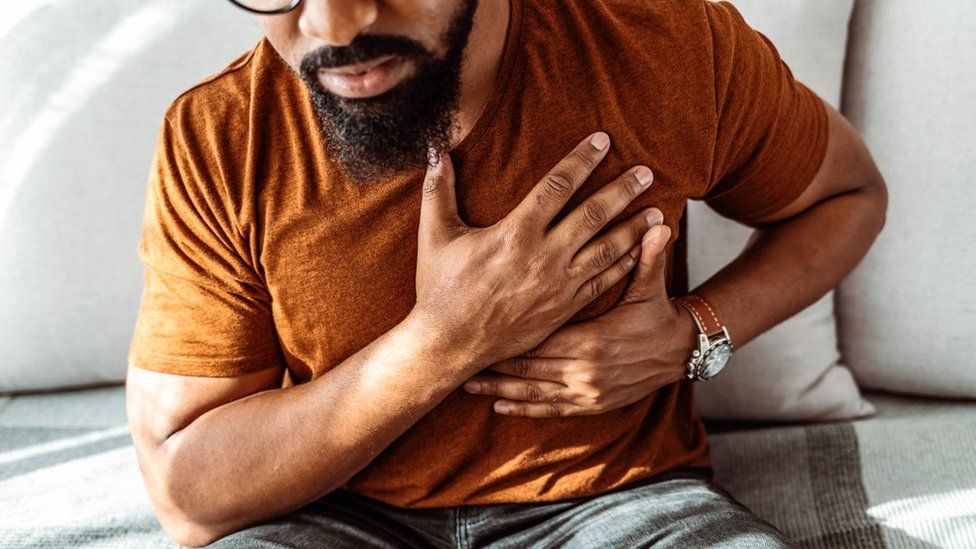

# <font color = 'Brown'> Predicting if a person has heart disease using Machine Learning <font>
This notebook details various python-based ML and data science libraries in an attempt to build a model which will be able to confidently predict if a person suffers from heart disease.

The following pipeline will be followed :
- Problem Definition
- Data 
- Evaluvation 
- Features 
- Modelling 
- Experimentation

# <font color = 'Brown'> Problem Definition <font>
> The goal is to predict if heart disease present, which represents whether or not a patient has heart disease:
- 0 represents no heart disease present
- 1 represents heart disease present|


### Preparing the tools
We will prepare the tools in order to build the model:

In [889]:
# All the EDA (exploratory data anlalysis)
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline 

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_auc_score
from scipy import stats

# <font color = 'Brown'> Data <font>
There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.

-	slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
-	thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
-	resting_blood_pressure (type: int): resting blood pressure
-	chest_pain_type (type: int): chest pain type (4 values)
- num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
-	fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
-	resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
-	serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
- oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
-	sex (type: binary): 0: female, 1: male
-	age (type: int): age in years
-	max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
-	exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)


### Dataset values

In [890]:
### Importing the data 
df = pd.read_csv(r'C:\Users\ethan\Documents\CDS\Project[Internship]\PRCP-1016-HeartDieseasePred\values.csv')
df_extra_column = pd.read_csv(r'C:\Users\ethan\Documents\CDS\Project[Internship]\PRCP-1016-HeartDieseasePred\labels.csv')
df = df.join(df_extra_column['heart_disease_present'])

In [891]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [892]:
#checking describe
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


### Rename the column names

In [893]:
df.rename(columns={
    'patient_id' : 'id',
    'slope_of_peak_exercise_st_segment':'slope',
    'thal':'thal',
    'resting_blood_pressure':'bp',
    'chest_pain_type':'cp',
    'num_major_vessels':'nmv',
    'fasting_blood_sugar_gt_120_mg_per_dl':'bs',
    'resting_ekg_results':'rekg',
    'serum_cholesterol_mg_per_dl':'chol',
    'oldpeak_eq_st_depression':'old',
    'sex':'sex',
    'age':'age',
    'max_heart_rate_achieved':'hr',
    'exercise_induced_angina':'eia',
    'heart_disease_present':'target'
}, inplace = True)
df.head()

,id,slope,thal,bp,cp,nmv,bs,rekg,chol,old,sex,age,hr,eia,target
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


###  Changing categorical data into binary data

In [894]:
#chnging thal values
df['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [895]:
df_dummies = pd.get_dummies(df, prefix='Rank', prefix_sep='_', columns=['thal'])

In [896]:
df = df_dummies
df

,id,slope,bp,cp,nmv,bs,rekg,chol,old,sex,age,hr,eia,target,Rank_fixed_defect,Rank_normal,Rank_reversible_defect
0,0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,125,4,2,1,0,254,0.2,1,67,163,0,1,0,0,1
176,2s2b1f,2,180,4,0,0,1,327,3.4,0,55,117,1,1,0,1,0
177,nsd00i,2,125,3,0,0,0,309,1.8,1,64,131,1,1,0,0,1
178,0xw93k,1,124,3,2,1,0,255,0.0,1,48,175,0,0,0,1,0


### Checking for null values

In [897]:
#Checking null values
df.isnull().sum()

id                        0
slope                     0
bp                        0
cp                        0
nmv                       0
bs                        0
rekg                      0
chol                      0
old                       0
sex                       0
age                       0
hr                        0
eia                       0
target                    0
Rank_fixed_defect         0
Rank_normal               0
Rank_reversible_defect    0
dtype: int64

There are no null values

# <font color = 'Brown'> Evaluvation <font>
To perform Exploratory Data Analysis, we need to perform two kinds of analysis:
    
- Univriate Analysis
- Bivariate Analysis

### Univariate Analysis


#### Plotting the slope

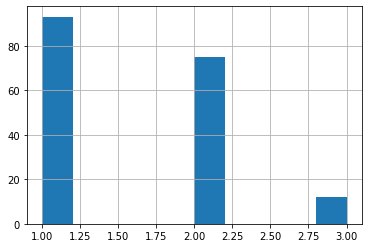

In [898]:
df.slope.hist()
plt.show()

#### Plotting sex

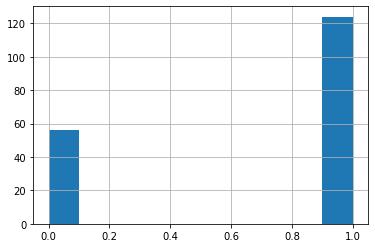

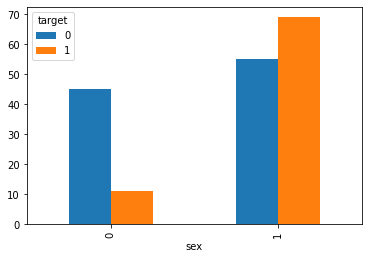

In [899]:
df.sex.hist()
plt.show()
pd.crosstab(df.sex, df.target).plot(kind="bar")

#### Plotting the Blood pressure

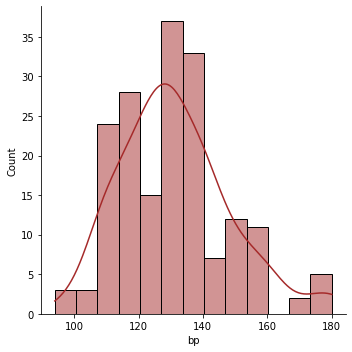

In [900]:
sns.displot(df.bp.dropna(axis=0),color='brown', kde=True )

#### Plotting other data

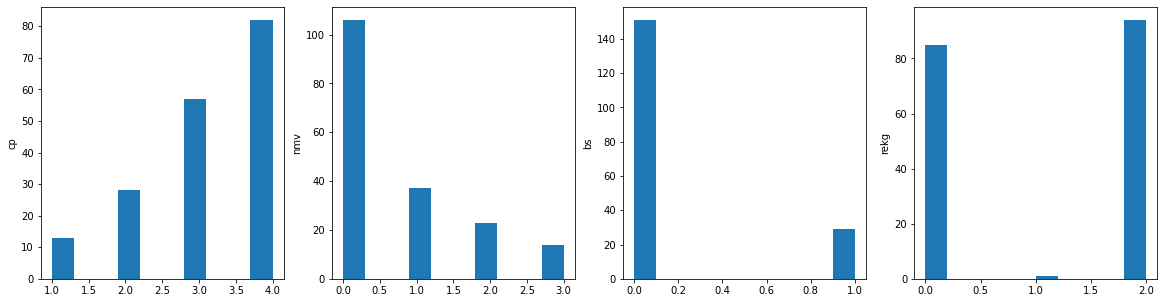

In [901]:
# Plotting other data cp	nmv	bs	rekg
fig, axs = plt.subplots(1,4,figsize=(20,5))
count=0
column_list = ['cp','nmv','bs','rekg']
for data in column_list:
    if count < 4:
        axs[count].hist(df[data])
        axs[count].set_ylabel(data)
        count+=1

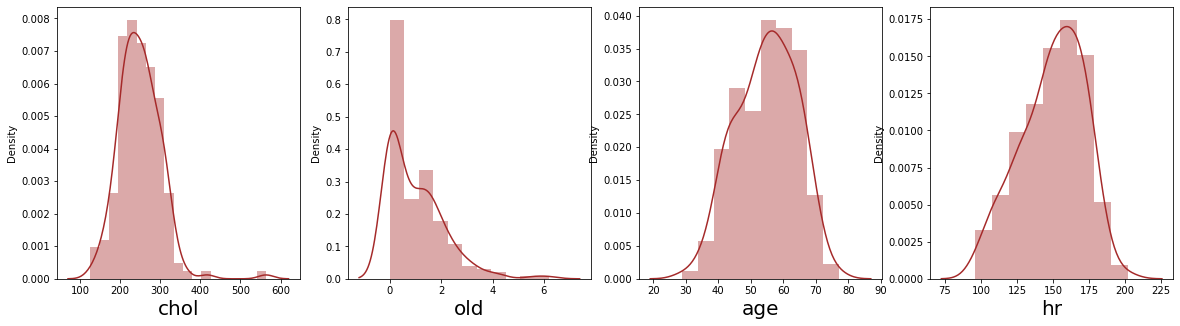

In [902]:
# Plotting chol old  age hr
fig, axs = plt.subplots(1,4,figsize=(20,5))
count=1
column_list = ['chol','old','age','hr']
for data in column_list:
    if count <=4:
        ax = plt.subplot(1,4,count)
        sns.distplot(df[data], color = 'brown')
        plt.xlabel(data ,fontsize=20)
        count+=1

#### Plotting [ eia	, target ,	Rank_fixed_defect ,	Rank_normal,	Rank_reversible_defect ]

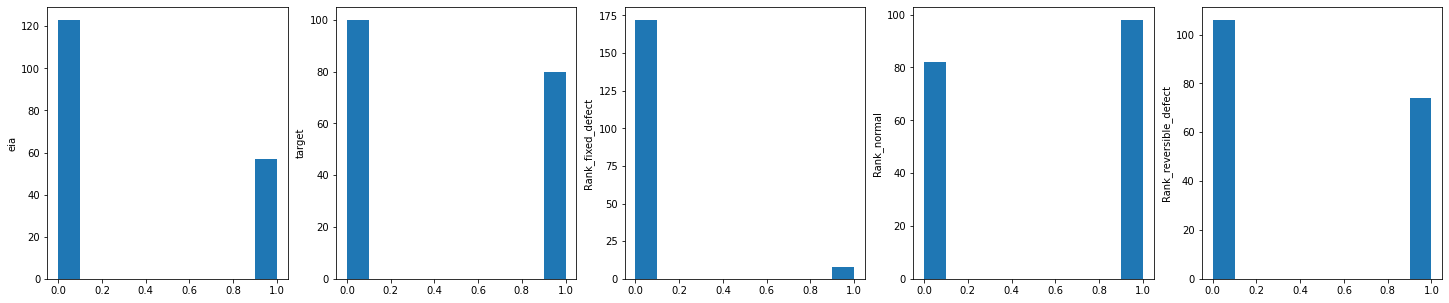

In [903]:
fig, axs = plt.subplots(1,5,figsize=(25,5))
count=0
column_list = ['eia' , 'target' , 'Rank_fixed_defect' , 'Rank_normal', 'Rank_reversible_defect']
for data in column_list:
    if count < 6:
        axs[count].hist(df[data])
        axs[count].set_ylabel(data)
        count+=1

### Bivariate Analysis

#### Data with respect to target variable 

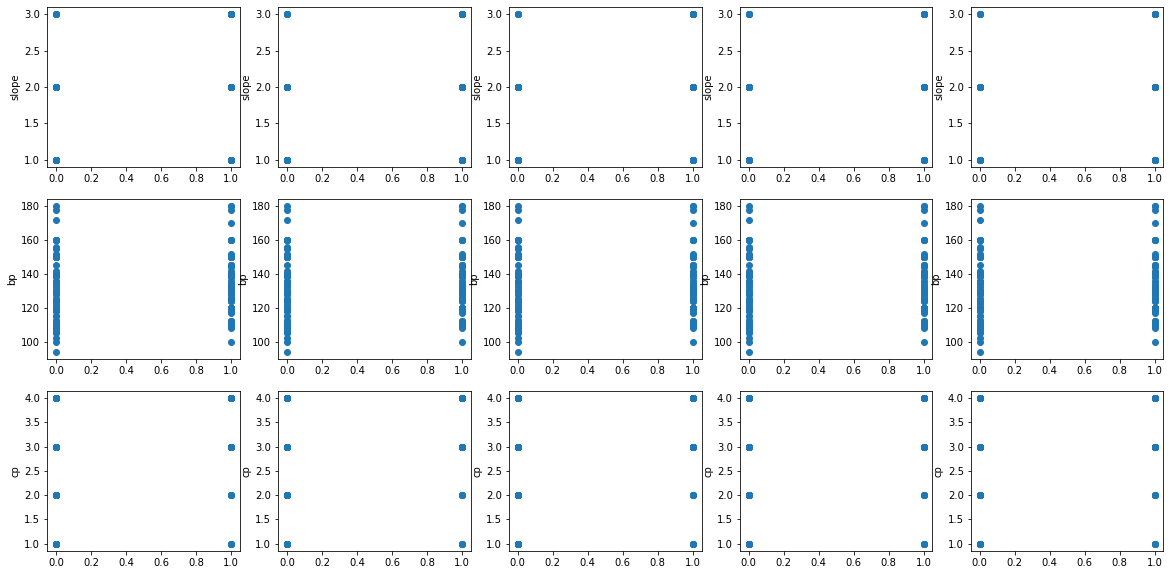

In [904]:
fig , axs = plt.subplots(3,5,figsize=(20,10))

column_list=['slope' , 'bp', 'cp' ,'nmv','bs','rekg' ,'chol','old', 'sex','age', 'hr','eia','Rank_fixed_defect','Rank_normal','Rank_reversible_defect']

i=0
for data in column_list:
    if i <= 2:
        for j in range(0,5) :
            axs[i][j].scatter( df.target ,df[data])
            axs[i][j].set_ylabel(data)
        i+=1
        


#### Slope with respect to old

Text(0, 0.5, 'old')

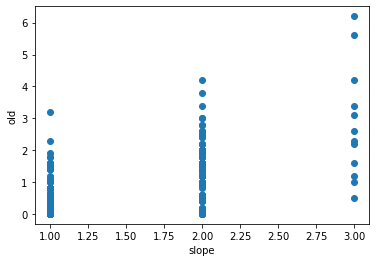

In [905]:
plt.scatter(df.slope , df.old )

plt.xlabel('slope')
plt.ylabel('old')

### Checking the correlation between values 

[]

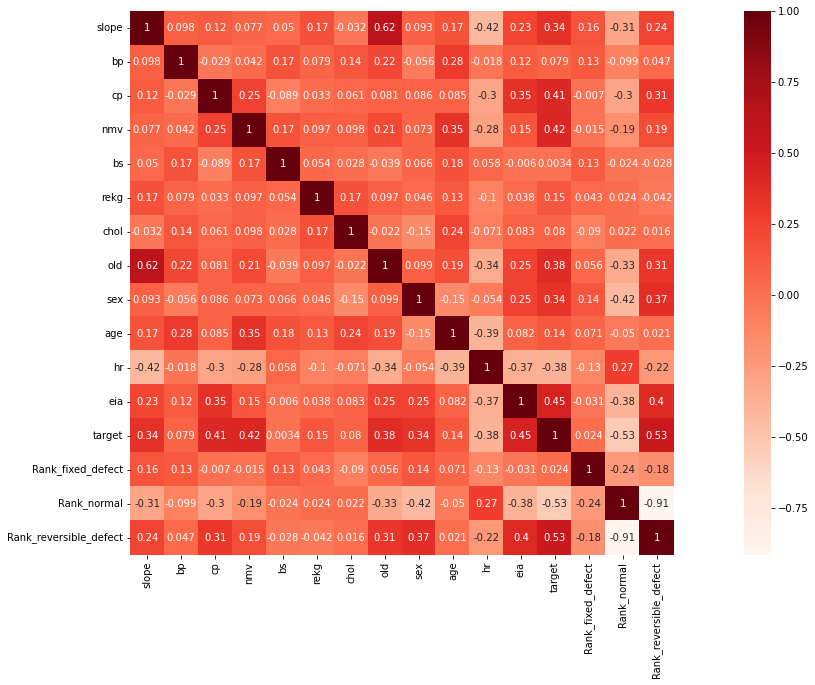

In [906]:
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(), cmap= 'Reds', annot = True , cbar=True , square= True)
plt.plot()

# <font color = 'Brown'> Features <font>

### Selecting the features using feature selection method 
We can see from the heatmap above that there seems to be strong correlation between some columns, we will select the features that will be used to predict the target properly.

In [907]:
df.head()

,id,slope,bp,cp,nmv,bs,rekg,chol,old,sex,age,hr,eia,target,Rank_fixed_defect,Rank_normal,Rank_reversible_defect
0,0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1


Target will be the 'target' variable and 'slope , bpcp, nmv, bs, rekg, chol, old, sex, age, hr, eia, Rank_fixed_defect,	Rank_normal, Rank_reversible_defect' are the independent variables. 

### Dropping id 

In [908]:
df = df.drop('id',axis = 1)

In [909]:
# There are now only 
df

,slope,bp,cp,nmv,bs,rekg,chol,old,sex,age,hr,eia,target,Rank_fixed_defect,Rank_normal,Rank_reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,1,0,0,1
176,2,180,4,0,0,1,327,3.4,0,55,117,1,1,0,1,0
177,2,125,3,0,0,0,309,1.8,1,64,131,1,1,0,0,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0,0,0,1,0


### Dealing with outliers

In [910]:
#fig , axs = plt.subplots( figsize = (20,10))
#sns.boxplot(data=df[column_list],ax=axs)
#plt.show()

### Removing the outliers

In [911]:
#def remove_outliers( data ):
#    IQR = stats.iqr(df[data], interpolation = 'midpoint') 
#    Q1 = df[data].quantile(0.25) 
#    Q3 =df[data].quantile(0.75)
#    min_limit=Q1 - 1.5*IQR
#    max_limit=Q3 +1.5*IQR
#    df.loc[df[data] > max_limit,data] = np.median(df[data])
#    df.loc[df[data] < min_limit,data] = np.median(df[data])
    

In [912]:
# removed column
#column_list=['slope' , 'bp', 'cp' ,'nmv','bs','rekg' ,'chol','old', 'sex','age', 'hr','eia','Rank_fixed_defect','Rank_normal','Rank_reversible_defect']
#for data in column_list:
#    remove_outliers(data = data)

In [913]:
#fig , axs = plt.subplots( figsize = (20,10))
#sns.boxplot(data=df[column_list],ax=axs)
#plt.show()

# <font color = 'Brown'> Modeling <font>

### We need to prepare the training and testing models

In [914]:
x= df.drop('target',axis =1 )
y= df.target

In [915]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

### Testing the model scores  of different models

In [916]:
# Put Models in a Dictionary
models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    # set random seeds
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [917]:
model_scores = fit_and_score(models=models, x_train=x_train, x_test=x_test, y_train = y_train, y_test = y_test)

In [918]:
model_scores

{'Logistic Regression': 0.8611111111111112,
 'KNN': 0.5277777777777778,
 'Random Forest': 0.8611111111111112}

### Hyperparameter tuning 

Maximum KNN Score on the test data: 61.11%


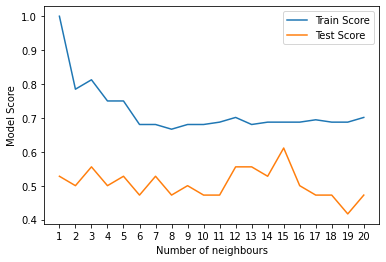

In [919]:
#using elbow method we can increase the efficiency 
train_scores = []
test_scores =[]
neighbors = range(1,21)
knn= KNeighborsClassifier() 

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test,y_test))
    
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

#### With randomised search 
- Logistic Regression( )
- RandomForest Classifier( ) 


In [920]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4, 4, 20),"solver":["liblinear"]}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000, 50), "max_depth":[None, 3, 5,10],
          "min_samples_split":np.arange(2, 20, 2), "min_samples_leaf":np.arange(1, 20, 2)}
# Tune LogisticRegression
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [921]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [922]:
rs_log_reg.score(x_test, y_test)

0.8333333333333334

In [923]:
# Setup Random seed
np.random.seed(42)
# Setup Random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid,cv=5, n_iter=20,verbose=True)
# Fit Random hyperparameter search model for RandomForestClassifer()
rs_rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   41.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [924]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [925]:
rs_rf.score(x_test, y_test)

0.8611111111111112

In [926]:
#there is an improvement in the accuracy 
model_scores

{'Logistic Regression': 0.8611111111111112,
 'KNN': 0.5277777777777778,
 'Random Forest': 0.8611111111111112}

#### Grid Search

In [927]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [928]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [929]:
# Evaluate the model
gs_log_reg.score(x_test, y_test)

0.8333333333333334

### ROC curve and AUC 
We will graph and find the score 

In [931]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(x_test)

In [932]:
y_preds

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [936]:
y_test

19     1
42     0
153    1
78     1
145    0
15     1
24     0
68     0
113    1
118    1
93     1
159    1
69     1
142    0
45     1
16     0
51     0
125    0
96     1
56     1
97     0
120    1
143    1
30     0
9      0
172    1
60     0
18     0
148    1
173    1
109    1
55     0
140    1
126    0
66     1
29     0
Name: target, dtype: int64

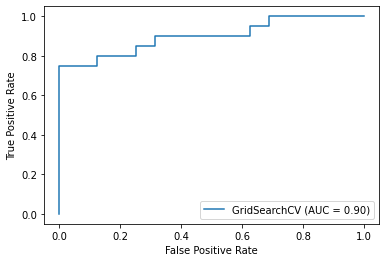

In [938]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, x_test, y_test);

### Confusion Matrix

[[15  1]
 [ 5 15]]


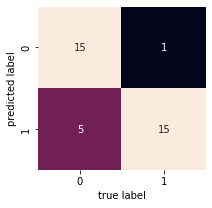

In [939]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

### Classification report


In [940]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



In [941]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [942]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,solver="liblinear")
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy") 
cv_acc

array([0.75      , 0.88888889, 0.91666667, 0.72222222, 0.88888889])

In [943]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8333333333333333

#### Precision score

In [944]:
cv_precision = np.mean(cross_val_score(clf, x,y,cv=5,scoring="precision")) 
cv_precision


0.8478937728937728

#### Recall 

In [947]:
cv_recall = np.mean(cross_val_score(clf,x,y,cv=5,scoring="recall"))
cv_recall

0.775

#### F1 score

In [948]:
cv_f1 = np.mean(cross_val_score(clf,x,y,cv=5,scoring="f1"))
cv_f1

0.8067511832319134

#### Cross validated metrics

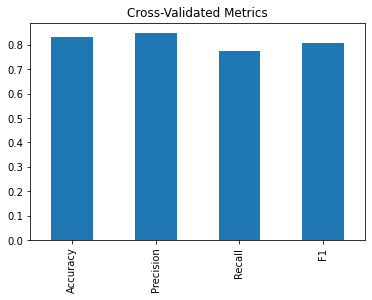

In [949]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### Feature importance

In [952]:
clf.fit(x_train, y_train);

In [953]:
clf.coef_

array([[ 2.73127267e-01, -5.65199828e-04,  5.82560898e-01,
         7.14543257e-01, -1.99092304e-01,  2.00362879e-01,
         3.29466527e-03,  5.17683513e-01,  4.72940352e-01,
        -3.45646577e-02, -2.04127094e-02,  5.81182970e-01,
        -4.82840397e-02, -5.64222106e-01,  5.61278880e-01]])

In [954]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'slope': 0.27312726739542076,
 'bp': -0.000565199828172456,
 'cp': 0.5825608979948862,
 'nmv': 0.7145432571642745,
 'bs': -0.19909230431902705,
 'rekg': 0.2003628786021291,
 'chol': 0.0032946652685429674,
 'old': 0.517683512763644,
 'sex': 0.472940352460685,
 'age': -0.034564657709666866,
 'hr': -0.020412709361125245,
 'eia': 0.5811829704863698,
 'target': -0.04828403969770383,
 'Rank_fixed_defect': -0.5642221059444201,
 'Rank_normal': 0.5612788800843183}

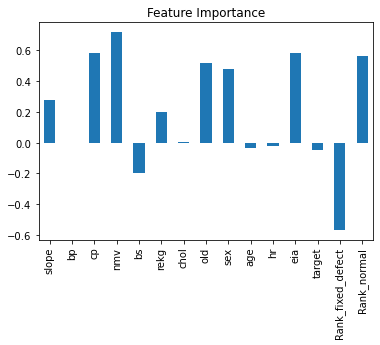

In [955]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

As we can see the features chest pain, mnv have very high correlation while Rank_fixed_detect has the lowest.

# Conclusion 

We can safely conclude that the accuracy of our prediction is 80 percent and can reliably predict heart disease.